In [1]:
%load_ext autoreload
%autoreload 2

import parenclitic
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, SVG
import igraph

In [2]:
print (parenclitic.__all__)

['parenclitic', 'pdf_kernel', 'classifier_kernel']


In [3]:
num_samples = 100
num_features = 30
shift = 1
X = np.random.randn(num_samples, num_features)
y = np.random.randint(2, size = (num_samples, ))
#y[0] = 0
#y[1] = 1
#print(y.shape)
#y[:] = 1

#print(y.shape)
mask = np.array(y, np.bool)
X[mask, :] += shift

clf = parenclitic.parenclitic(kernel = parenclitic.pdf_kernel(thr_p = 0.05), verbose = 1)
clf.fit(X, y, mask)
clf.calc_parenclitic(need_weights = False)
gr = clf.get_graphs()


parenclitic_graphs
Graph for 20 pairs calculated in 0.19486878699996169
Graph for 40 pairs calculated in 0.3873745559999975
Graph for 60 pairs calculated in 0.5878157369999713
Graph for 80 pairs calculated in 0.7931965159999663
Graph for 100 pairs calculated in 1.027324311999962
Graph for 120 pairs calculated in 1.3086398169999711
Graph for 140 pairs calculated in 1.5154231679999839
Graph for 160 pairs calculated in 1.7141878150000025
Graph for 180 pairs calculated in 1.9078790399999548
Graph for 200 pairs calculated in 2.116120625999997
Graph for 220 pairs calculated in 2.3515582260000087
Graph for 240 pairs calculated in 2.584663599999999
Graph for 260 pairs calculated in 2.7855405930000074
Graph for 280 pairs calculated in 2.9787727159999804
Graph for 300 pairs calculated in 3.180725026999994
Graph for 320 pairs calculated in 3.388030248000007
Graph for 340 pairs calculated in 3.5845238559999757
Graph for 360 pairs calculated in 3.789594749999992
Graph for 380 pairs calculated in 3.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 0.016741658000000825
Parenclitic 8 0.0009221530000331768
Parenclitic 9 1.1840000411211804e-06
Parenclitic 10 0.0008929410000177995
Metrics
110 30
False
IGRAPH U-W- 30 110 --
+ attr: weight (e)
+ edges:
 0 --  7 15 21 26
 1 --  3  6 15
 2 --  6 15
 3 --  1  4  5  6  7  9 11 15 21 23 24 26
 4 --  3  6  7  9 13 15 21 26 29
 5 --  3  6  7  8  9 12 13 15 21 23 26 29
 6 --  1  2  3  4  5  7  9 12 13 14 15 21 23 24 26 29
 7 --  0  3  4  5  6  9 10 12 13 15 20 21 23 26 29
 8 --  5  9 15 21 26
 9 --  3  4  5  6  7  8 13 15 21 22 26 29
10 --  7
11 --  3 15 26
12 --  5  6  7 15 21
13 --  4  5  6  7  9 15 21 23 29
14 --  6 15
15 --  0  1  2  3  4  5  6  7  8  9 11 12 13 14 16 17 18 19 20 21 22 23 24 25
26 27 29
16 -- 15 21
17 -- 15
18 -- 15 21
19 -- 15
20 --  7 15 21 26
21 --  0  3  4  5  6  7  8  9 12 13 15 16 18 20 22 23 24 25 26 27 28 29
22 --  9 15 21 23
23 --  3  5  6  7 13 15 21 22 24 26 29
24 --  3  6 15 21 23 26
25 -- 15 21
26 --  0  3  4  5  6  7  8  9 11 15 20 21 23 24 29
27 -- 15 21
28

[array([0, 3]), array([0, 6]), array([0, 7]), array([0, 8]), array([ 0, 10]), array([ 0, 11]), array([ 0, 24]), array([ 0, 25]), array([1, 3]), array([2, 3]), array([2, 6]), array([2, 7]), array([ 2, 10]), array([ 2, 11]), array([ 2, 15]), array([ 2, 16]), array([ 2, 24]), array([ 2, 25]), array([ 2, 26]), array([3, 4]), array([3, 5]), array([3, 6]), array([3, 7]), array([3, 8]), array([3, 9]), array([ 3, 10]), array([ 3, 11]), array([ 3, 12]), array([ 3, 13]), array([ 3, 14]), array([ 3, 15]), array([ 3, 16]), array([ 3, 17]), array([ 3, 18]), array([ 3, 19]), array([ 3, 20]), array([ 3, 21]), array([ 3, 22]), array([ 3, 23]), array([ 3, 24]), array([ 3, 25]), array([ 3, 26]), array([ 3, 27]), array([ 3, 29]), array([4, 6]), array([ 5, 10]), array([ 5, 25]), array([6, 7]), array([6, 8]), array([ 6, 10]), array([ 6, 11]), array([ 6, 12]), array([ 6, 14]), array([ 6, 15]), array([ 6, 16]), array([ 6, 18]), array([ 6, 22]), array([ 6, 23]), array([ 6, 24]), array([ 6, 25]), array([ 6, 26

normalized -0.0013516490000142767
Parenclitic: eigenvalues 0.006836406999980227
Parenclitic 7 0.010406197000008888
Parenclitic 8 0.000649769999995442
Parenclitic 9 3.9500002912973287e-07
Parenclitic 10 0.0008775450000371166
Metrics
62 30
False
IGRAPH U-W- 30 62 --
+ attr: weight (e)
+ edges:
0--1 0--6 0--8 1--2 1--3 1--4 1--5 1--6 1--7 1--8 1--9 1--10 1--11 1--12 1--13
1--14 1--15 1--16 1--17 1--18 1--19 1--20 1--21 1--22 1--23 1--24 1--25 1--26
1--27 1--28 1--29 2--6 3--6 3--12 5--6 5--8 5--10 5--12 6--7 6--8 6--10 6--11
6--12 6--13 6--14 6--15 6--16 6--20 6--21 6--22 6--24 6--25 6--27 6--29 8--10
8--12 8--13 10--11 10--12 10--15 10--27 12--22
[array([0, 1]), array([0, 6]), array([0, 8]), array([1, 2]), array([1, 3]), array([1, 4]), array([1, 5]), array([1, 6]), array([1, 7]), array([1, 8]), array([1, 9]), array([ 1, 10]), array([ 1, 11]), array([ 1, 12]), array([ 1, 13]), array([ 1, 14]), array([ 1, 15]), array([ 1, 16]), array([ 1, 17]), array([ 1, 18]), array([ 1, 19]), array([ 1, 

Parenclitic 1 0.004401150000035159
here1
here2
here3
here4
Parenclitic 2 0.004428781999990861
here5
here6
[74.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 208.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 182.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
here7
Parenclitic 3 0.012894748000007894
Parenclitic 4 0.006289272999993045
Parenclitic 5 0.0025710539999863613
Parenclitic centrality 0.00351373500001273
Eigenvectors -0.0017460109999660745
intervals -0.0017460109999660745
normalized -0.0017460109999660745
Parenclitic: eigenvalues 0.007474334999983512
Parenclitic 7 0.013264634999984537
Parenclitic 8 0.007594342000004417
Parenclitic 9 7.890000119914475e-07
Parenclitic 10 0.001401783999995132
Metrics
0 30
False
IGRAPH U-W- 30 0 --
+ attr: weight (e)
[]
Parenclitic 1 0.0044394409999881645
here1
here2
here3
here4
Parenclitic 2 0.007589604000031613
here5
here6
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

[array([0, 7]), array([ 0, 24]), array([ 0, 25]), array([ 1, 24]), array([ 1, 25]), array([2, 7]), array([ 2, 24]), array([ 2, 25]), array([3, 5]), array([3, 6]), array([3, 7]), array([ 3, 10]), array([ 3, 13]), array([ 3, 14]), array([ 3, 15]), array([ 3, 16]), array([ 3, 17]), array([ 3, 19]), array([ 3, 23]), array([ 3, 24]), array([ 3, 25]), array([ 3, 27]), array([ 3, 28]), array([ 4, 24]), array([ 4, 25]), array([5, 7]), array([ 5, 10]), array([ 5, 13]), array([ 5, 23]), array([ 5, 24]), array([ 5, 25]), array([ 6, 10]), array([ 6, 13]), array([ 6, 23]), array([ 6, 24]), array([ 6, 25]), array([ 7, 10]), array([ 7, 11]), array([ 7, 12]), array([ 7, 13]), array([ 7, 14]), array([ 7, 15]), array([ 7, 17]), array([ 7, 18]), array([ 7, 19]), array([ 7, 21]), array([ 7, 22]), array([ 7, 23]), array([ 7, 24]), array([ 7, 25]), array([ 7, 26]), array([ 7, 27]), array([ 7, 28]), array([ 8, 13]), array([ 8, 24]), array([ 8, 25]), array([ 9, 24]), array([ 9, 25]), array([10, 11]), array([1

Parenclitic 1 0.0035046550000288335
here1
here2
here3
here4
Parenclitic 2 0.004849198999977489
here5
here6
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
here7
Parenclitic 3 0.008552416999975776
Parenclitic 4 0.0032456949999755125
Parenclitic 5 0.00627782499998375
Parenclitic centrality 0.0026436890000240965
Eigenvectors -0.0012576969999713583
intervals -0.0012576969999713583
normalized -0.0012576969999713583
Parenclitic: eigenvalues 0.010275533000026371
Parenclitic 7 0.017094965000012508
Parenclitic 8 0.000767012999972394
Parenclitic 9 7.900000014160469e-07
Parenclitic 10 0.0011207160000026306
Metrics
35 30
False
IGRAPH U-W- 30 35 --
+ attr: weight (e)
+ edges:
0--5 0--19 1--10 1--13 1--17 1--27 3--5 4--5 5--6 5--9 5--10 5--11 5--12 5--13
5--15 5--17 5--18 5--19 5--20 5--22 5--23 5--25 5--26 5--27 5--29 10--15
10--19 11--17 13--17 13--19 13--27 13--29 17--19 19--22 19--27
[array([0,

[array([0, 6]), array([ 0, 13]), array([ 0, 28]), array([1, 2]), array([1, 3]), array([1, 6]), array([1, 7]), array([1, 9]), array([ 1, 13]), array([ 1, 18]), array([ 1, 27]), array([ 1, 28]), array([2, 6]), array([ 2, 13]), array([ 2, 14]), array([ 2, 28]), array([3, 5]), array([3, 6]), array([3, 7]), array([3, 9]), array([ 3, 13]), array([ 3, 14]), array([ 3, 15]), array([ 3, 24]), array([ 3, 25]), array([ 3, 27]), array([ 3, 28]), array([ 3, 29]), array([4, 6]), array([ 4, 13]), array([ 4, 28]), array([5, 6]), array([5, 7]), array([ 5, 10]), array([ 5, 13]), array([ 5, 20]), array([ 5, 28]), array([6, 7]), array([6, 8]), array([6, 9]), array([ 6, 10]), array([ 6, 11]), array([ 6, 13]), array([ 6, 14]), array([ 6, 15]), array([ 6, 16]), array([ 6, 18]), array([ 6, 21]), array([ 6, 23]), array([ 6, 24]), array([ 6, 26]), array([ 6, 27]), array([ 6, 28]), array([ 6, 29]), array([ 7, 13]), array([ 7, 15]), array([ 7, 28]), array([ 8, 13]), array([ 8, 15]), array([ 8, 28]), array([ 9, 13

Parenclitic 1 0.004406676000030529
here1
here2
here3
here4
Parenclitic 2 0.004436677000001055
here5
here6
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
here7
Parenclitic 3 0.008600578000027781
Parenclitic 4 0.005175268000016331
Parenclitic 5 0.004861040999969646
Parenclitic centrality 0.003085817999988194
Eigenvectors -0.0008056990000113728
intervals -0.0008056990000113728
normalized -0.0008056990000113728
Parenclitic: eigenvalues 0.005912279999961356
Parenclitic 7 0.010470147999967594
Parenclitic 8 0.0013034890000085397
Parenclitic 9 7.900000014160469e-07
Parenclitic 10 0.00104294900000923
Metrics
0 30
False
IGRAPH U-W- 30 0 --
+ attr: weight (e)
[]
Parenclitic 1 0.005009864999976799
here1
here2
here3
here4
Parenclitic 2 0.004473785000016051
here5
here6
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

[array([0, 1]), array([0, 8]), array([ 0, 12]), array([ 0, 20]), array([ 0, 25]), array([1, 2]), array([1, 3]), array([1, 4]), array([1, 5]), array([1, 6]), array([1, 7]), array([1, 8]), array([1, 9]), array([ 1, 10]), array([ 1, 11]), array([ 1, 12]), array([ 1, 13]), array([ 1, 14]), array([ 1, 15]), array([ 1, 16]), array([ 1, 17]), array([ 1, 18]), array([ 1, 19]), array([ 1, 20]), array([ 1, 21]), array([ 1, 22]), array([ 1, 23]), array([ 1, 24]), array([ 1, 25]), array([ 1, 26]), array([ 1, 27]), array([ 1, 28]), array([ 1, 29]), array([2, 8]), array([ 2, 25]), array([3, 8]), array([ 3, 12]), array([ 3, 20]), array([ 3, 25]), array([4, 8]), array([ 4, 13]), array([ 4, 20]), array([ 4, 25]), array([5, 8]), array([ 5, 25]), array([6, 8]), array([ 6, 12]), array([ 6, 20]), array([ 6, 25]), array([ 6, 26]), array([7, 8]), array([ 7, 25]), array([8, 9]), array([ 8, 10]), array([ 8, 11]), array([ 8, 12]), array([ 8, 13]), array([ 8, 14]), array([ 8, 15]), array([ 8, 16]), array([ 8, 17

[array([0, 1]), array([0, 2]), array([0, 3]), array([0, 4]), array([0, 5]), array([0, 6]), array([0, 7]), array([0, 8]), array([0, 9]), array([ 0, 10]), array([ 0, 11]), array([ 0, 12]), array([ 0, 13]), array([ 0, 14]), array([ 0, 15]), array([ 0, 16]), array([ 0, 17]), array([ 0, 18]), array([ 0, 19]), array([ 0, 20]), array([ 0, 21]), array([ 0, 22]), array([ 0, 23]), array([ 0, 24]), array([ 0, 25]), array([ 0, 26]), array([ 0, 27]), array([ 0, 28]), array([ 0, 29]), array([1, 3]), array([ 1, 18]), array([ 1, 21]), array([ 1, 28]), array([ 2, 12]), array([ 2, 18]), array([ 2, 20]), array([ 2, 21]), array([ 2, 28]), array([3, 4]), array([3, 5]), array([ 3, 12]), array([ 3, 14]), array([ 3, 16]), array([ 3, 18]), array([ 3, 20]), array([ 3, 21]), array([ 3, 24]), array([ 3, 25]), array([ 3, 27]), array([ 3, 28]), array([ 4, 18]), array([ 4, 20]), array([ 4, 21]), array([ 4, 27]), array([ 4, 28]), array([ 5, 18]), array([ 5, 21]), array([ 5, 28]), array([ 6, 18]), array([ 6, 21]), arr

Eigenvectors -0.0011128209999924366
intervals -0.0011128209999924366
normalized -0.0011128209999924366
Parenclitic: eigenvalues 0.0061862420000124985
Parenclitic 7 0.010313825000025645
Parenclitic 8 0.0010812409999516603
Parenclitic 9 7.900000014160469e-07
Parenclitic 10 0.001158613000029618
Metrics
0 30
False
IGRAPH U-W- 30 0 --
+ attr: weight (e)
[]
Parenclitic 1 0.004961309999998775
here1
here2
here3
here4
Parenclitic 2 0.0038682269999981145
here5
here6
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
here7
Parenclitic 3 0.006171241000004102
Parenclitic 4 0.00478643200000306
Parenclitic 5 0.004140214000017295
Parenclitic centrality 0.00419903400000976
Eigenvectors -0.0007942510000020775
intervals -0.0007942510000020775
normalized -0.0007942510000020775
Parenclitic: eigenvalues 0.0066595559999882425
Parenclitic 7 0.010161052999990261
Parenclitic 8 0.0009367590000124437
Parenclitic 9 

Parenclitic 1 0.006282166999994843
here1
here2
here3
here4
Parenclitic 2 0.01604254200003652
here5
here6
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0, 153.0, 47.0, 0.0, 367.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
here7
Parenclitic 3 0.01389940500001785
Parenclitic 4 0.004327724000006583
Parenclitic 5 0.00467471599995406
Parenclitic centrality 0.003494391000003816
Eigenvectors -0.0019564170000307968
intervals -0.0019564170000307968
normalized -0.0019564170000307968
Parenclitic: eigenvalues 0.012587231999987125
Parenclitic 7 0.018326607999995304
Parenclitic 8 0.006259666999994806
Parenclitic 9 3.9400003970513353e-07
Parenclitic 10 0.0015067889999613726
Metrics
103 30
False
IGRAPH U-W- 30 103 --
+ attr: weight (e)
+ edges:
 0 --  3  4  7 11 18 19
 1 --  3  4  7 13 18 19 24
 2 --  7 19
 3 --  0  1  4  6  7 14 18 19 23 24 25 26
 4 --  0  1  3  6  7 10 11 12 13 14 16 18 19 20 21 22 23 24 25 26 27 28 29
 5 --  7 18
 6 --  3  4  7 11 18 19
 7 -- 

24 25 26 27 28
[array([0, 3]), array([0, 9]), array([ 0, 19]), array([ 0, 20]), array([ 0, 24]), array([ 0, 29]), array([1, 3]), array([1, 4]), array([1, 6]), array([ 1, 10]), array([ 1, 14]), array([ 1, 15]), array([ 1, 19]), array([ 1, 20]), array([ 1, 22]), array([ 1, 24]), array([ 1, 25]), array([ 1, 29]), array([2, 3]), array([ 2, 19]), array([ 2, 20]), array([ 2, 24]), array([ 2, 29]), array([3, 6]), array([3, 7]), array([3, 8]), array([3, 9]), array([ 3, 10]), array([ 3, 11]), array([ 3, 12]), array([ 3, 14]), array([ 3, 15]), array([ 3, 16]), array([ 3, 17]), array([ 3, 19]), array([ 3, 20]), array([ 3, 21]), array([ 3, 22]), array([ 3, 24]), array([ 3, 25]), array([ 3, 27]), array([ 3, 29]), array([ 4, 19]), array([ 4, 20]), array([ 4, 24]), array([ 4, 29]), array([ 5, 20]), array([ 5, 24]), array([ 5, 29]), array([6, 8]), array([ 6, 10]), array([ 6, 17]), array([ 6, 19]), array([ 6, 20]), array([ 6, 24]), array([ 6, 29]), array([ 7, 20]), array([ 7, 24]), array([ 7, 29]), arr

Parenclitic 1 0.006773640000005798
here1
here2
here3
here4
Parenclitic 2 0.009134684000002835
here5
here6
[290.0, 0.0, 0.0, 0.0, 0.0, 0.0, 54.0, 0.0, 106.0, 0.0, 28.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 298.0, 0.0]
here7
Parenclitic 3 0.011950488000024961
Parenclitic 4 0.005613053999979911
Parenclitic 5 0.0039041499999825646
Parenclitic centrality 0.004018628999972407
Eigenvectors -0.0010299220000433706
intervals -0.0010299220000433706
normalized -0.0010299220000433706
Parenclitic: eigenvalues 0.013564650999967398
Parenclitic 7 0.018508985999972083
Parenclitic 8 0.009292980999987321
Parenclitic 9 1.1839999842777615e-06
Parenclitic 10 0.0011720350000246071
Metrics
0 30
False
IGRAPH U-W- 30 0 --
+ attr: weight (e)
[]
Parenclitic 1 0.004821171000003233
here1
here2
here3
here4
Parenclitic 2 0.004910781000035058
here5
here6
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

[array([0, 3]), array([0, 4]), array([0, 5]), array([ 0, 12]), array([ 0, 18]), array([ 0, 22]), array([ 0, 24]), array([1, 5]), array([ 1, 12]), array([ 1, 18]), array([ 1, 22]), array([ 1, 24]), array([2, 5]), array([ 2, 12]), array([ 2, 18]), array([ 2, 22]), array([ 2, 24]), array([ 2, 29]), array([3, 4]), array([3, 5]), array([ 3, 12]), array([ 3, 16]), array([ 3, 17]), array([ 3, 18]), array([ 3, 19]), array([ 3, 22]), array([ 3, 23]), array([ 3, 24]), array([ 3, 25]), array([ 3, 29]), array([4, 5]), array([ 4, 10]), array([ 4, 12]), array([ 4, 13]), array([ 4, 17]), array([ 4, 18]), array([ 4, 22]), array([ 4, 24]), array([ 4, 29]), array([5, 6]), array([5, 7]), array([5, 8]), array([5, 9]), array([ 5, 10]), array([ 5, 11]), array([ 5, 12]), array([ 5, 13]), array([ 5, 14]), array([ 5, 15]), array([ 5, 16]), array([ 5, 17]), array([ 5, 18]), array([ 5, 19]), array([ 5, 20]), array([ 5, 21]), array([ 5, 22]), array([ 5, 23]), array([ 5, 24]), array([ 5, 25]), array([ 5, 26]), arr

[array([0, 1]), array([0, 3]), array([0, 4]), array([0, 5]), array([0, 6]), array([0, 7]), array([0, 8]), array([0, 9]), array([ 0, 10]), array([ 0, 12]), array([ 0, 14]), array([ 0, 15]), array([ 0, 16]), array([ 0, 17]), array([ 0, 18]), array([ 0, 19]), array([ 0, 20]), array([ 0, 22]), array([ 0, 23]), array([ 0, 24]), array([ 0, 25]), array([ 0, 26]), array([ 0, 27]), array([ 0, 29]), array([1, 4]), array([1, 6]), array([1, 8]), array([ 1, 10]), array([ 1, 12]), array([ 1, 14]), array([ 1, 15]), array([ 1, 16]), array([ 1, 17]), array([ 1, 20]), array([ 1, 23]), array([ 1, 24]), array([ 1, 25]), array([ 1, 29]), array([2, 4]), array([ 2, 12]), array([ 2, 15]), array([ 2, 16]), array([ 2, 23]), array([ 2, 24]), array([ 3, 10]), array([ 3, 14]), array([ 3, 15]), array([ 3, 16]), array([ 3, 17]), array([ 3, 23]), array([ 3, 24]), array([4, 5]), array([4, 6]), array([4, 7]), array([4, 8]), array([ 4, 10]), array([ 4, 12]), array([ 4, 13]), array([ 4, 14]), array([ 4, 15]), array([ 4, 

Parenclitic centrality 0.003216877999989265
Eigenvectors -0.0009639969999852838
intervals -0.0009639969999852838
normalized -0.0009639969999852838
Parenclitic: eigenvalues 0.005326459999992039
Parenclitic 7 0.008559128000001692
Parenclitic 8 0.0005676609999909488
Parenclitic 9 3.9500002912973287e-07
Parenclitic 10 0.0013804660000005242
Metrics
0 30
False
IGRAPH U-W- 30 0 --
+ attr: weight (e)
[]
Parenclitic 1 0.003533077999975376
here1
here2
here3
here4
Parenclitic 2 0.004724455000030048
here5
here6
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
here7
Parenclitic 3 0.0071569500000236985
Parenclitic 4 0.0038662529999555773
Parenclitic 5 0.005460677999963082
Parenclitic centrality 0.00390691299998025
Eigenvectors -0.001314937000017835
intervals -0.001314937000017835
normalized -0.001314937000017835
Parenclitic: eigenvalues 0.006031102000008559
Parenclitic 7 0.009497070999998414
Parencl

[array([0, 1]), array([ 0, 18]), array([ 0, 24]), array([ 0, 25]), array([1, 2]), array([1, 3]), array([1, 4]), array([1, 5]), array([1, 6]), array([1, 8]), array([1, 9]), array([ 1, 10]), array([ 1, 11]), array([ 1, 12]), array([ 1, 14]), array([ 1, 15]), array([ 1, 16]), array([ 1, 18]), array([ 1, 19]), array([ 1, 21]), array([ 1, 22]), array([ 1, 23]), array([ 1, 24]), array([ 1, 25]), array([ 1, 26]), array([ 1, 28]), array([2, 4]), array([ 2, 18]), array([ 2, 24]), array([ 2, 25]), array([3, 4]), array([3, 5]), array([3, 6]), array([3, 9]), array([ 3, 14]), array([ 3, 16]), array([ 3, 18]), array([ 3, 19]), array([ 3, 24]), array([ 3, 25]), array([4, 5]), array([4, 6]), array([4, 8]), array([4, 9]), array([ 4, 10]), array([ 4, 13]), array([ 4, 16]), array([ 4, 18]), array([ 4, 19]), array([ 4, 21]), array([ 4, 24]), array([ 4, 25]), array([ 4, 29]), array([5, 9]), array([ 5, 10]), array([ 5, 16]), array([ 5, 18]), array([ 5, 19]), array([ 5, 24]), array([ 5, 25]), array([ 5, 28])

[array([0, 6]), array([ 0, 16]), array([ 0, 24]), array([1, 6]), array([ 1, 14]), array([ 1, 16]), array([ 1, 24]), array([2, 6]), array([ 2, 14]), array([ 2, 16]), array([ 2, 24]), array([3, 6]), array([ 3, 14]), array([ 3, 16]), array([ 3, 24]), array([ 3, 26]), array([4, 6]), array([4, 7]), array([ 4, 10]), array([ 4, 13]), array([ 4, 14]), array([ 4, 16]), array([ 4, 18]), array([ 4, 19]), array([ 4, 21]), array([ 4, 24]), array([ 4, 26]), array([ 4, 29]), array([5, 6]), array([ 5, 14]), array([ 5, 16]), array([ 5, 24]), array([6, 7]), array([6, 8]), array([6, 9]), array([ 6, 10]), array([ 6, 11]), array([ 6, 12]), array([ 6, 13]), array([ 6, 14]), array([ 6, 15]), array([ 6, 16]), array([ 6, 17]), array([ 6, 18]), array([ 6, 19]), array([ 6, 20]), array([ 6, 21]), array([ 6, 22]), array([ 6, 23]), array([ 6, 24]), array([ 6, 25]), array([ 6, 26]), array([ 6, 27]), array([ 6, 28]), array([ 6, 29]), array([ 7, 14]), array([ 7, 16]), array([ 7, 18]), array([ 7, 24]), array([ 7, 26]),

[array([ 0, 23]), array([ 0, 25]), array([ 0, 29]), array([ 1, 23]), array([ 1, 25]), array([ 2, 23]), array([ 2, 25]), array([ 2, 29]), array([ 3, 25]), array([ 3, 29]), array([ 4, 23]), array([ 4, 25]), array([ 4, 29]), array([ 5, 23]), array([ 5, 25]), array([ 6, 16]), array([ 6, 18]), array([ 6, 23]), array([ 6, 25]), array([ 7, 25]), array([ 8, 23]), array([ 8, 25]), array([ 8, 29]), array([ 9, 23]), array([ 9, 25]), array([ 9, 29]), array([10, 25]), array([11, 23]), array([11, 25]), array([11, 29]), array([12, 23]), array([12, 25]), array([13, 25]), array([14, 23]), array([14, 25]), array([14, 29]), array([15, 23]), array([15, 25]), array([15, 29]), array([16, 18]), array([16, 22]), array([16, 23]), array([16, 25]), array([16, 29]), array([17, 18]), array([17, 23]), array([17, 25]), array([17, 29]), array([18, 22]), array([18, 23]), array([18, 25]), array([18, 29]), array([19, 23]), array([19, 25]), array([19, 29]), array([20, 25]), array([20, 29]), array([21, 23]), array([21, 25

Parenclitic 1 0.0031722699999932047
here1
here2
here3
here4
Parenclitic 2 0.004576815999996597
here5
here6
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 57.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 253.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 289.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
here7
Parenclitic 3 0.009114156999999068
Parenclitic 4 0.0045669470000007095
Parenclitic 5 0.004650636000008035
Parenclitic centrality 0.0035863699999936216
Eigenvectors -0.001963522999972156
intervals -0.001963522999972156
normalized -0.001963522999972156
Parenclitic: eigenvalues 0.008450964000019212
Parenclitic 7 0.017886847999989186
Parenclitic 8 0.004334830000004786
Parenclitic 9 1.1850000305457797e-06
Parenclitic 10 0.0012908569999581232
Metrics
123 30
False
IGRAPH U-W- 30 123 --
+ attr: weight (e)
+ edges:
 0 --  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
25 26 27 28 29
 1 --  0  4  8 13 14 17
 2 --  0 13 14
 3 --  0  4  8 13 14 17 18 26
 4 --  0  1  3  8  9 10 11 12 13 14 16 17 18 19 20 21 2

Parenclitic 1 0.006477966999966611
here1
here2
here3
here4
Parenclitic 2 0.0043593049999799405
here5
here6
[0.0, 0.0, 0.0, 0.0, 0.0, 55.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.0, 0.0, 0.0, 265.0, 0.0, 328.0, 0.0, 0.0, 28.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
here7
Parenclitic 3 0.007502362000025187
Parenclitic 4 0.003630977999989682
Parenclitic 5 0.0034209669999540893
Parenclitic centrality 0.005656477000002269
Eigenvectors -0.0006943779999915023
intervals -0.0006943779999915023
normalized -0.0006943779999915023
Parenclitic: eigenvalues 0.006986810000000787
Parenclitic 7 0.011271111000041856
Parenclitic 8 0.00612308000000894
Parenclitic 9 7.890000119914475e-07
Parenclitic 10 0.0015462640000123429
Metrics
81 30
False
IGRAPH U-W- 30 81 --
+ attr: weight (e)
+ edges:
 0 --  1  2  5  7  8  9 11 16 23 24 25                                 27 --
9
 1 --  0  2  4  5  6  7  8  9 10 13 15 16 18 21 24 25 29               28 --
9 16
 2 --  0  1  5  6  7  8  9 13 15 16 18 21 25              

Parenclitic 1 0.0049980229999846415
here1
here2
here3
here4
Parenclitic 2 0.0048270919999708894
here5
here6
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 153.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 378.0, 0.0, 0.0, 0.0, 0.0, 0.0]
here7
Parenclitic 3 0.006191373999968164
Parenclitic 4 0.004477337000025727
Parenclitic 5 0.0053406719999884444
Parenclitic centrality 0.00423258800003623
Eigenvectors -0.0012111159999790289
intervals -0.0012111159999790289
normalized -0.0012111159999790289
Parenclitic: eigenvalues 0.0075982879999969555
Parenclitic 7 0.01203812400001425
Parenclitic 8 0.005848723999974936
Parenclitic 9 7.889999551480287e-07
Parenclitic 10 0.0016469280000137587
Metrics
117 30
False
IGRAPH U-W- 30 117 --
+ attr: weight (e)
+ edges:
 0 --  1  3  4  5  6  8 10 11 13 14 15 16 17 19 20 21 22 23 24 26 27 28 29
 1 --  0  2  4  6  8 11 13 15 16 17 18 19 21 24 28 29
 2 --  1  6  8
 3 --  0  8 17 28
 4 --  0  1  6  8 13 16 17 21 22 24 26 27 28 29
 5 --  0 

[array([0, 1]), array([0, 2]), array([0, 3]), array([0, 4]), array([0, 5]), array([0, 6]), array([0, 7]), array([0, 8]), array([0, 9]), array([ 0, 10]), array([ 0, 11]), array([ 0, 12]), array([ 0, 13]), array([ 0, 14]), array([ 0, 15]), array([ 0, 16]), array([ 0, 17]), array([ 0, 18]), array([ 0, 19]), array([ 0, 20]), array([ 0, 21]), array([ 0, 22]), array([ 0, 23]), array([ 0, 24]), array([ 0, 25]), array([ 0, 26]), array([ 0, 27]), array([ 0, 28]), array([ 0, 29]), array([ 1, 15]), array([ 1, 16]), array([ 2, 15]), array([ 2, 16]), array([3, 6]), array([ 3, 10]), array([ 3, 15]), array([ 3, 16]), array([ 3, 20]), array([ 3, 24]), array([ 3, 26]), array([4, 6]), array([ 4, 15]), array([ 4, 16]), array([ 5, 15]), array([ 5, 16]), array([6, 7]), array([6, 8]), array([ 6, 10]), array([ 6, 11]), array([ 6, 12]), array([ 6, 14]), array([ 6, 15]), array([ 6, 16]), array([ 6, 17]), array([ 6, 20]), array([ 6, 21]), array([ 6, 23]), array([ 6, 24]), array([ 6, 26]), array([ 6, 29]), array

[array([0, 1]), array([0, 2]), array([0, 3]), array([0, 4]), array([0, 5]), array([0, 6]), array([0, 7]), array([0, 8]), array([0, 9]), array([ 0, 12]), array([ 0, 13]), array([ 0, 14]), array([ 0, 15]), array([ 0, 17]), array([ 0, 18]), array([ 0, 20]), array([ 0, 21]), array([ 0, 23]), array([ 0, 27]), array([ 0, 28]), array([ 0, 29]), array([1, 3]), array([ 1, 14]), array([ 1, 15]), array([ 1, 20]), array([ 1, 23]), array([ 2, 14]), array([ 2, 20]), array([ 2, 23]), array([3, 4]), array([3, 5]), array([ 3, 14]), array([ 3, 15]), array([ 3, 17]), array([ 3, 20]), array([ 3, 23]), array([ 3, 24]), array([4, 5]), array([4, 8]), array([ 4, 12]), array([ 4, 13]), array([ 4, 14]), array([ 4, 15]), array([ 4, 20]), array([ 4, 23]), array([ 4, 29]), array([5, 6]), array([5, 8]), array([ 5, 10]), array([ 5, 11]), array([ 5, 12]), array([ 5, 13]), array([ 5, 14]), array([ 5, 15]), array([ 5, 17]), array([ 5, 20]), array([ 5, 23]), array([ 5, 24]), array([ 5, 25]), array([ 5, 26]), array([ 5, 

[array([0, 1]), array([0, 2]), array([0, 3]), array([0, 4]), array([0, 5]), array([0, 6]), array([0, 7]), array([0, 8]), array([0, 9]), array([ 0, 10]), array([ 0, 11]), array([ 0, 12]), array([ 0, 13]), array([ 0, 15]), array([ 0, 16]), array([ 0, 17]), array([ 0, 18]), array([ 0, 20]), array([ 0, 21]), array([ 0, 23]), array([ 0, 24]), array([ 0, 25]), array([ 0, 26]), array([ 0, 28]), array([ 0, 29]), array([1, 3]), array([1, 4]), array([1, 6]), array([ 1, 10]), array([ 1, 11]), array([ 1, 12]), array([ 1, 13]), array([ 1, 14]), array([ 1, 16]), array([ 1, 18]), array([ 1, 19]), array([ 1, 20]), array([ 1, 25]), array([ 1, 27]), array([ 1, 29]), array([2, 3]), array([2, 6]), array([ 2, 10]), array([ 2, 11]), array([ 2, 12]), array([ 2, 14]), array([ 2, 18]), array([ 2, 20]), array([ 2, 22]), array([ 2, 25]), array([ 2, 27]), array([3, 5]), array([3, 6]), array([3, 7]), array([3, 8]), array([ 3, 10]), array([ 3, 11]), array([ 3, 12]), array([ 3, 13]), array([ 3, 14]), array([ 3, 16])

intervals -0.0009276799999611285
normalized -0.0009276799999611285
Parenclitic: eigenvalues 0.006720743000016682
Parenclitic 7 0.013030939000032049
Parenclitic 8 0.004007575999992241
Parenclitic 9 3.9500002912973287e-07
Parenclitic 10 0.001098214000023745
Metrics
80 30
False
IGRAPH U-W- 30 80 --
+ attr: weight (e)
+ edges:
 0 --  2  6  8  9 20 23
 1 --  2  6 23
 2 --  0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
25 26 27 28 29
 3 --  2  6  7 20 23 29
 4 --  2  6 23 29
 5 --  2 23
 6 --  0  1  2  3  4  7  8  9 10 11 14 15 18 19 20 23 24 25 26 27 29
 7 --  2  3  6
 8 --  0  2  6 23 25 29
 9 --  0  2  6 25 29
10 --  2  6
11 --  2  6 29
12 --  2
13 --  2
14 --  2  6
15 --  2  6 23
16 --  2
17 --  2 23
18 --  2  6 23 29
19 --  2  6
20 --  0  2  3  6 23 25 29
21 --  2
22 --  2 23 29
23 --  0  1  2  3  4  5  6  8 15 17 18 20 22 25 29
24 --  2  6
25 --  2  6  8  9 20 23 29
26 --  2  6 29
27 --  2  6
28 --  2
29 --  2  3  4  6  8  9 11 18 20 22 23 25 26
[array([0, 2]),

Parenclitic 7 0.014070728999968196
Parenclitic 8 0.0010026830000242626
Parenclitic 9 7.890000119914475e-07
Parenclitic 10 0.0010082099999522143
Metrics
0 30
False
IGRAPH U-W- 30 0 --
+ attr: weight (e)
[]
Parenclitic 1 0.004418124000039825
here1
here2
here3
here4
Parenclitic 2 0.005489890000035302
here5
here6
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
here7
Parenclitic 3 0.015536462999989453
Parenclitic 4 0.00390730800000938
Parenclitic 5 0.0041441630000349505
Parenclitic centrality 0.004389701000036439
Eigenvectors -0.0011894040000015593
intervals -0.0011894040000015593
normalized -0.0011894040000015593
Parenclitic: eigenvalues 0.00666073999997252
Parenclitic 7 0.011634681999964869
Parenclitic 8 0.0015316590000225005
Parenclitic 9 7.900000014160469e-07
Parenclitic 10 0.001029527000014241
Metrics
117 30
False
IGRAPH U-W- 30 117 --
+ attr: weight (e)
+ edges:
 0 -- 18 24 25
 1 -- 

Parenclitic 1 0.004986574999975346
here1
here2
here3
here4
Parenclitic 2 0.004349042000001191
here5
here6
[0.0, 28.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 370.0, 0.0, 0.0, 0.0, 0.0, 0.0, 81.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.0, 0.0, 175.0, 0.0, 0.0, 0.0, 0.0]
here7
Parenclitic 3 0.012003781000032632
Parenclitic 4 0.003458074000036504
Parenclitic 5 0.005111713000019336
Parenclitic centrality 0.004531814000017675
Eigenvectors -0.0009580759999607835
intervals -0.0009580759999607835
normalized -0.0009580759999607835
Parenclitic: eigenvalues 0.00932416800003466
Parenclitic 7 0.015785556000025736
Parenclitic 8 0.0033613580000064758
Parenclitic 9 7.890000119914475e-07
Parenclitic 10 0.0009399169999824153
Metrics
121 30
False
IGRAPH U-W- 30 121 --
+ attr: weight (e)
+ edges:
 0 --  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
25 26 27 28 29
 1 --  0 15
 2 --  0  4  6 10 12 15 17 23
 3 --  0  6 15
 4 --  0  2  6  8  9 10 11 12 13 14 15 17 18 20 21 22 23 24 26 28
 5

In [106]:
import matplotlib.pylab as pylab
import matplotlib
import seaborn
seaborn.set_style('white', {'legend.frameon':True})
fontsize = 40
params = {'legend.fontsize': fontsize,
  'figure.figsize': (18, 15),
 'axes.labelsize': fontsize,
 'axes.titlesize':fontsize,
 'xtick.labelsize':fontsize,
 'ytick.labelsize':fontsize}
pylab.rcParams.update(params)

#plt.style.use('ggplot')
%matplotlib inline

Text(0, 0.5, 'Marker 2')

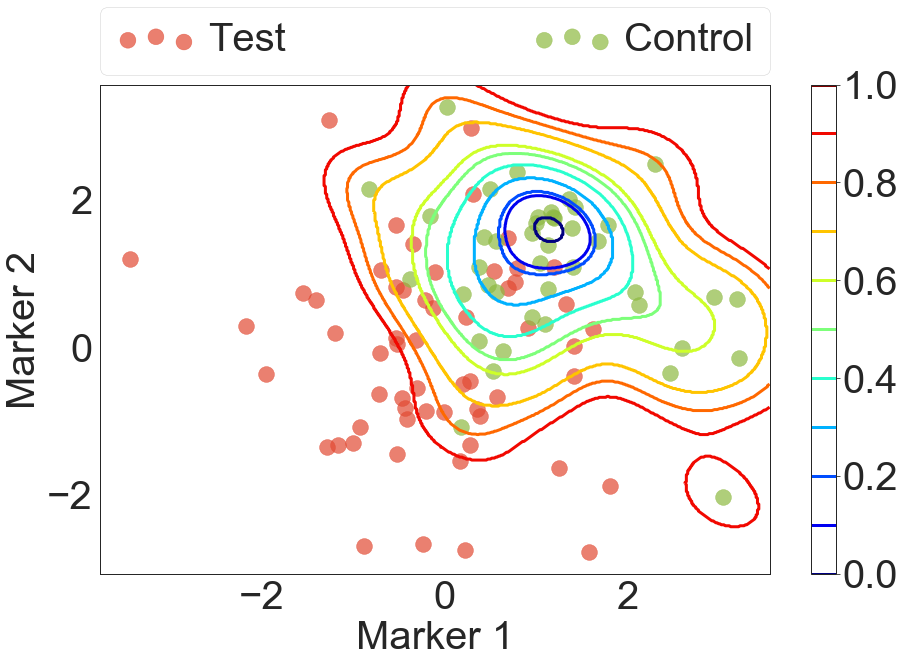

In [121]:
import scipy.stats as stats
def plot_kde_dist(fig, ax, xu, xv, kde_mask, threshold_p = 0, num_points = 100000):
    
    data = np.array([xu[kde_mask], xv[kde_mask]]).astype('float32')
    kde = stats.gaussian_kde(data)

    points = kde.resample(num_points)
    pr = np.array(kde(points))
    pr = np.sort(pr)
    
    x_min = np.min(xu)
    x_max = np.max(xu)
    y_min = np.min(xv)
    y_max = np.max(xv)
    
    dx = (x_max - x_min) * 0.05
    dy = (y_max - y_min) * 0.05
    
    x_min -= dx
    x_max += dx 
    y_min -= dy
    y_max += dy
    
    Xm, Ym = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    positions = np.vstack([Xm.ravel(), Ym.ravel()])
    #threshold_p = 0.9
    ZI = np.zeros(Xm.shape[0] * Xm.shape[1])
    for i, pt in enumerate(positions.T):
        p = kde(np.array([pt[0], pt[1]])) # .reshape(1, -1)
        pos = np.searchsorted(pr, p)
        w = float(num_points - pos) / num_points
        ZI[i] = w
        if ZI[i] < threshold_p:
            ZI[i] = 0
    ZI = np.reshape(ZI, Xm.shape)
    
    out = ax.contour(Xm, Ym, ZI, np.linspace(0, 1, 11), cmap = 'jet', linewidths = 3) # , **params
    #ZI = np.log(1 - ZI, Xm.shape)
    
    #im = ax.imshow(np.rot90(ZI), cmap="jet", extent=[x_min, x_max, y_min, y_max], aspect='auto')#, norm=matplotlib.colors.LogNorm())
    
    cb = fig.colorbar(out)
    cb.set_clim(0,1)
    

fig = plt.figure(figsize = (15, 9))
ax = plt.axes()
xu = X[:, 0]
xv = X[:, 1]
plot_kde_dist(fig, ax, xu, xv, mask, threshold_p = 0, num_points = 100)
labels = ['Test', 'Control']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ax.set_prop_cycle('color', [colors[0], colors[5], colors[1]])

for c in [0, 1]:
    ax.scatter(xu[mask == c], xv[mask == c], 250, label = labels[c], alpha=0.7)
ax.legend(framealpha=0.9, fontsize=fontsize, bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0., handletextpad=0.3, scatterpoints=3)   
plt.xlabel('Marker 1', fontsize = fontsize)
plt.ylabel('Marker 2', fontsize = fontsize)

In [20]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

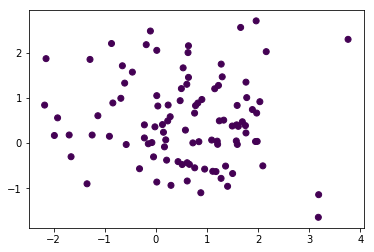

In [4]:
plt.scatter(X[:, 0], X[:, 1], c = mask)

0 0 0 110 92 0 98 0 124 0 0 62 173 68 0 128 0 0 122 0 0 0 0 67 0 35 0 0 97 106 0 0 107 0 0 0 147 116 0 139 146 0 125 0 0 154 223 103 125 148 141 102 0 0 0 104 0 163 231 98 0 0 154 0 0 149 91 135 145 0 74 147 108 123 0 15 100 81 77 116 117 56 117 69 0 116 102 161 92 52 80 0 92 0 0 0 117 0 130 121 

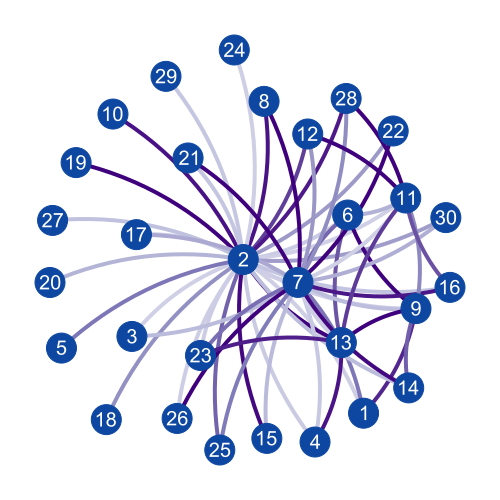

In [102]:
for g in gr:
    print(g.ecount(), end=' ')
visual_style = {}
visual_style["bbox"] = (300, 300)
visual_style["margin"] = 10
cmap = plt.cm.Purples
norm = matplotlib.colors.Normalize() 

g = gr[11]

visual_style["edge_width"] = 4
visual_style["edge_color"] = np.array(cmap(0.3 + norm(np.array(g.es['weight']))))[:, 0:3].tolist()
visual_style["vertex_color"] = '#0D47A1'
visual_style["vertex_frame_color"] = visual_style["vertex_color"]
visual_style["vertex_label_size"] = 20
visual_style["vertex_size"] = 30
visual_style["vertex_label"] = [str(x + 1) for x in range(30)]
visual_style["vertex_label_color"] = 'white'
visual_style["vertex_label_dist"] = -0.5
visual_style["edge_curved"] = [0.2 for x in range(g.ecount())]
visual_style["bbox"] = [500, 500]
visual_style["margin"] = np.array([0.5, 0.5, 0.5, 0.5]) * 100
p = igraph.plot(g, "graph.png", **visual_style)
display(SVG(p._repr_svg_()))

In [10]:
par = clf.get_parenclitic()
print (type(par))
print (par.shape)
print (parenclitic.parenclitic.metric_names())
print (par.head())

<class 'pandas.core.frame.DataFrame'>
(100, 40)
{'degrees': 'Degrees', 'min_degrees': 'Min degrees', 'max_degrees': 'Max degrees', 'mean_degrees': 'Mean degrees', 'std_degrees': 'Std degrees', 'efficiency': 'Efficiency', 'betweenness': 'Betweenness', 'min_betweenness': 'Min betweenness', 'max_betweenness': 'Max betweenness', 'mean_betweenness': 'Mean betweenness', 'std_betweenness': 'Std betweenness', 'closeness': 'Closeness', 'min_closeness': 'Min closeness', 'max_closeness': 'Max closeness', 'mean_closeness': 'Mean closeness', 'std_closeness': 'Std closeness', 'pagerank': 'Pagerank', 'min_pagerank': 'Min pagerank', 'max_pagerank': 'Max pagerank', 'mean_pagerank': 'Mean pagerank', 'std_pagerank': 'Std pagerank', 'eigenvalues': 'Eigenvalues', 'min_eigenvector_centrality': 'Min eigenvector centrality', 'max_eigenvector_centrality': 'Max eigenvector centrality', 'mean_eigenvector_centrality': 'Mean eigenvector centrality', 'std_eigenvector_centrality': 'Std eigenvector centrality', 'num_

In [9]:
parenclitic.__all__

['parenclitic', 'pdf_kernel', 'classifier_kernel']

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
par_numeric = par.select_dtypes(include=numerics)
print (par_numeric.head())

   efficiency   max_IPR  max_betweenness  max_closeness  max_degrees  \
0   12.785207  0.704458            177.0       3.332507    42.018580   
1    0.000000  1.000000              0.0       0.033333     0.000000   
2    3.668922  0.500000             33.0       0.060284     3.189633   
3    6.396413  0.650000            102.0       4.238327    31.636519   
4    1.450383  0.500000             27.0       0.053510     3.049204   

   max_eigenvector_centrality  max_pagerank  max_weights  mean_IPR  \
0                         1.0      0.039119     2.573403  0.321016   
1                         1.0      0.033333          NaN  1.000000   
2                         1.0      0.110202     0.474736  0.278776   
3                         1.0      0.039142     1.638885  0.300922   
4                         1.0      0.169275     0.574375  0.299838   

   mean_betweenness  ...  min_weights  num_edges  robustness  std_betweenness  \
0         21.933333  ...     0.000443        364          19     